In [1]:
#Imports

import pandas as pd


In [2]:
# List of CSV files
csv_files = ['metro-trips-2023-q1.csv', 'metro-trips-2023-q2.csv', 'metro-trips-2023-q3.csv', 'metro-trips-2023-q3.csv']
# All csv files:
import os

# Specify the directory containing the CSV files

# Get all files in the directory
all_files = os.listdir()

# Filter out only CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]
# Create an empty list to store data frames
dfs = []

# Read each CSV file and append its data frame to the list
for file in csv_files:
    dfs.append(pd.read_csv(file, dtype={'bike_id': str}))




       total_trips  avg_trip_duration
month                                
1            82135          32.832921
2            84888          33.396464
3            78562          37.745679
4            84637          40.539008
5           104849          40.461769
6           101893          41.681470
7           105069          43.499005
8           103734          41.694835
9           124923          37.246464
10          115170          37.253712
11           93631          35.671508
12           82900          35.286248


<Figure size 1000x600 with 0 Axes>

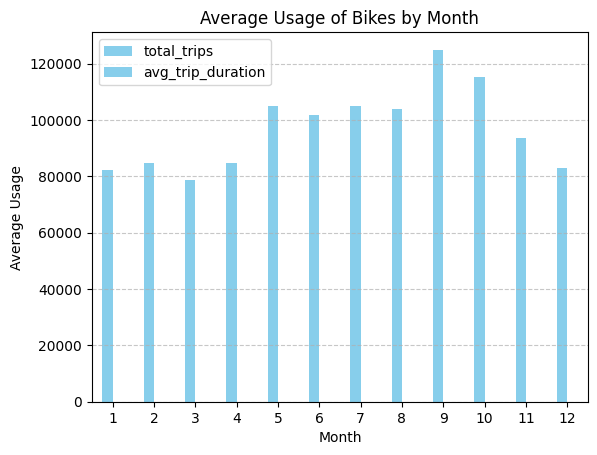

In [3]:
# Average usage of bikes in different months
import matplotlib.pyplot as plt

combined_df = pd.concat(dfs, ignore_index=True)

# Convert 'start_time' column to datetime objects if it's not already in that format
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# Extract month from 'start_time' and create a new column for it
combined_df['month'] = combined_df['start_time'].dt.month

# Group the data by month and calculate the number of trips and average trip duration
monthly_summary = combined_df.groupby('month').agg(
    total_trips=('trip_id', 'count'),
    avg_trip_duration=('duration', 'mean')
)
print(monthly_summary)

# Plot the data
plt.figure(figsize=(10, 6))
monthly_summary.plot(kind='bar', color='skyblue')
plt.title('Average Usage of Bikes by Month')
plt.xlabel('Month')
plt.ylabel('Average Usage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# I need a bike in 1 hour: How many bikes got taken last year between this time? add and remove:
# Specify the station ID and time range
station_id = 3054
end_time = pd.Timestamp.now() - pd.DateOffset(years=1)
start_time = end_time - pd.DateOffset(hours=9)

# Filter trip data to include only trips starting at the specified station and within the time range
filtered_trips = combined_df[
    (combined_df['start_station'] == station_id) & 
    (combined_df['start_time'] >= start_time) & 
    (combined_df['start_time'] <= end_time)
]

# Extract unique bike IDs
unique_bikes = filtered_trips['bike_id'].unique()

print("Bikes that started at station 3054 within the specified time frame:")
print(unique_bikes)

Bikes that started at station 3054 within the specified time frame:
['14993']
